# 线性代数核心概念详解

## 📚 目录

1. 对角矩阵
2. 正交矩阵
3. 奇异性与奇异矩阵
4. 它们之间的关系
5. 在SVD中的作用

---


## 🔷 对角矩阵

### 定义

**对角矩阵 = 只有对角线上有值，其他位置都是0的矩阵**

对角矩阵的形式：
```
[a₁  0   0   0]
[0   a₂  0   0]
[0   0   a₃  0]
[0   0   0   a₄]
```

### 几何意义：纯粹的缩放变换

**对角矩阵是最简单的变换：只拉伸或压缩，不旋转！**

**关键特点**：
- x方向：拉伸2倍（第1个对角元素）
- y方向：拉伸3倍（第2个对角元素）
- **坐标轴方向不变！只是长度改变**

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

print("✓ 导入成功！")


✓ 导入成功！


### Python代码示例：对角矩阵的变换


对角矩阵 D:
[[2 0]
 [0 3]]



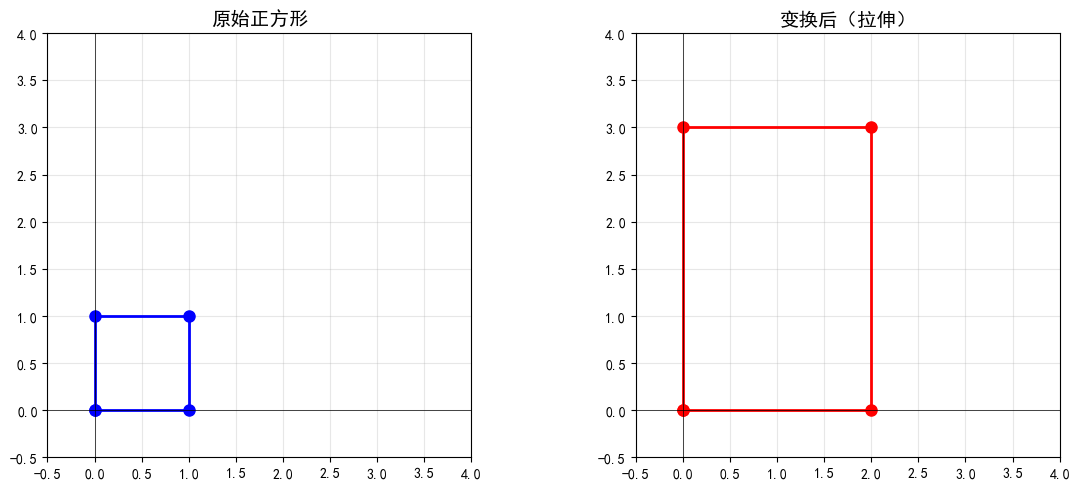


变换特点：
- x方向拉伸2倍
- y方向拉伸3倍
- 坐标轴方向不变


In [3]:
# 创建对角矩阵
D = np.diag([2, 3])  # [2,0; 0,3]
print("对角矩阵 D:")
print(D)
print()

# 测试变换
points = np.array([[1, 0, 1, 0],
                   [0, 1, 1, 0]])  # 正方形的4个顶点

transformed = D @ points

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 原始图形
ax1.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'bo-', linewidth=2, markersize=8)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 4)
ax1.set_aspect('equal')
ax1.set_title('原始正方形', fontsize=14)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# 变换后的图形
ax2.plot([0, 2, 2, 0, 0], [0, 0, 3, 3, 0], 'ro-', linewidth=2, markersize=8)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-0.5, 4)
ax2.set_aspect('equal')
ax2.set_title('变换后（拉伸）', fontsize=14)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n变换特点：")
print("- x方向拉伸2倍")
print("- y方向拉伸3倍")
print("- 坐标轴方向不变")


## 🔶 正交矩阵

### 定义

**正交矩阵 = 其列向量（或行向量）相互垂直且长度为1的矩阵**

**数学定义**：`Q^T · Q = I`

**重要性质**：
1. Q^T · Q = I  （转置乘自己等于单位矩阵）
2. Q · Q^T = I  （也成立！）
3. **Q^(-1) = Q^T** （逆矩阵就是转置！）

### 几何意义：保持长度和角度的变换

**正交矩阵 = 旋转 + 反射（不改变形状和大小）**

**关键特性**：
1. 保持向量长度
2. 保持角度
3. 保持面积/体积

---


### 验证正交性


In [4]:
# 创建旋转矩阵（旋转30度）
theta = np.pi / 6  # 30度
Q = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

print("正交矩阵 Q:")
print(Q)
print()

# 验证1：Q^T @ Q = I
QT_Q = Q.T @ Q
print("Q^T @ Q =")
print(QT_Q)
print("是否等于单位矩阵？", np.allclose(QT_Q, np.eye(2)))
print()

# 验证3：列向量长度
col1 = Q[:, 0]
col2 = Q[:, 1]
print("第1列长度:", np.linalg.norm(col1))
print("第2列长度:", np.linalg.norm(col2))
print()

# 验证4：列向量垂直
dot_product = np.dot(col1, col2)
print("列向量点积:", dot_product)
print("是否垂直？", np.abs(dot_product) < 1e-10)


正交矩阵 Q:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]

Q^T @ Q =
[[1.00000000e+00 7.43708407e-18]
 [7.43708407e-18 1.00000000e+00]]
是否等于单位矩阵？ True

第1列长度: 1.0
第2列长度: 1.0

列向量点积: 0.0
是否垂直？ True


## 🔺 奇异性与奇异矩阵

### 什么是"奇异"？

**奇异（Singular）= 不可逆 = 行列式为0**

**奇异矩阵**：
- 没有逆矩阵
- 行列式 det(A) = 0
- 将某些非零向量映射到零向量
- 把空间"压扁"了！

**非奇异矩阵**：
- 有逆矩阵
- 行列式 det(A) ≠ 0
- 只有零向量映射到零向量

---


### 检测奇异性


In [5]:
def check_singularity(A, name="矩阵"):
    """检查矩阵是否奇异"""
    print(f"\n{'='*50}")
    print(f"检查 {name}")
    print(f"{'='*50}")
    print(A)
    
    # 方法1：行列式
    det = np.linalg.det(A)
    print(f"\n行列式: {det:.6f}")
    
    # 方法2：秩
    rank = np.linalg.matrix_rank(A)
    print(f"秩: {rank} / {A.shape[0]}")
    
    # 方法3：尝试求逆
    try:
        inv_A = np.linalg.inv(A)
        print("逆矩阵存在 ✓")
    except np.linalg.LinAlgError:
        print("逆矩阵不存在 ✗")
    
    # 判断
    is_singular = np.abs(det) < 1e-10 or rank < A.shape[0]
    if is_singular:
        print(f"\n结论: {name} 是 奇异矩阵 ❌")
    else:
        print(f"\n结论: {name} 是 非奇异矩阵 ✓")
    
    return is_singular

# 测试
A_singular = np.array([[2, 4],
                       [1, 2]])

A_nonsingular = np.array([[3, 1],
                          [2, 5]])

check_singularity(A_singular, "A（奇异）")
check_singularity(A_nonsingular, "B（非奇异）")



检查 A（奇异）
[[2 4]
 [1 2]]

行列式: 0.000000
秩: 1 / 2
逆矩阵不存在 ✗

结论: A（奇异） 是 奇异矩阵 ❌

检查 B（非奇异）
[[3 1]
 [2 5]]

行列式: 13.000000
秩: 2 / 2
逆矩阵存在 ✓

结论: B（非奇异） 是 非奇异矩阵 ✓


np.False_

### 条件数（Condition Number）

条件数衡量矩阵的"健康程度"：`cond(A) = σ_max / σ_min`

**含义**：
- cond ≈ 1    : 完美！数值稳定
- cond < 100  : 良好
- cond < 10^6 : 勉强可用
- cond > 10^6 : 病态！数值不稳定
- cond = ∞    : 奇异！不可逆


In [6]:
# 良好的矩阵
A_good = np.array([[3, 1],
                   [1, 3]])

# 病态的矩阵
A_ill = np.array([[1, 1],
                  [1, 1.0001]])

print("良好矩阵的条件数:", np.linalg.cond(A_good))
print("病态矩阵的条件数:", np.linalg.cond(A_ill))

print("\n解释：")
print("- 条件数≈2: 良好，数值稳定")
print("- 条件数≈20000: 病态，微小误差会放大！")


良好矩阵的条件数: 2.0000000000000004
病态矩阵的条件数: 40002.00007491187

解释：
- 条件数≈2: 良好，数值稳定
- 条件数≈20000: 病态，微小误差会放大！


## 🌟 在SVD中的作用

### SVD分解详解

```
A = U · Σ · V^T
    ↓   ↓   ↓
    │   │   └─ V^T: 正交矩阵，旋转输入空间
    │   └───── Σ:   对角矩阵，各方向缩放
    └───────── U:   正交矩阵，旋转输出空间
```

**任何矩阵都可以分解为：旋转·缩放·旋转**

---


### 完整SVD示例


In [7]:
# 创建一个矩阵
A = np.array([[3, 1],
              [1, 3]])

# SVD分解
U, S, VT = np.linalg.svd(A)

print("原矩阵 A:")
print(A)
print()

print("U (正交矩阵):")
print(U)
print("验证正交性: U^T @ U =")
print(np.round(U.T @ U, 10))
print()

print("奇异值 Σ:")
print(S)
print()

print("V^T (正交矩阵):")
print(VT)
print()

# 重构验证
A_reconstructed = U @ np.diag(S) @ VT
print("重构的 A:")
print(A_reconstructed)
print("是否等于原矩阵？", np.allclose(A, A_reconstructed))
print()

# 检查奇异性
print("是否奇异？")
print("最小奇异值:", S[-1])
if S[-1] < 1e-10:
    print("是奇异矩阵（有零奇异值）")
else:
    print("非奇异矩阵（所有奇异值都非零）")
    
print("\n条件数:", S[0] / S[-1])


原矩阵 A:
[[3 1]
 [1 3]]

U (正交矩阵):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
验证正交性: U^T @ U =
[[1. 0.]
 [0. 1.]]

奇异值 Σ:
[4. 2.]

V^T (正交矩阵):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

重构的 A:
[[3. 1.]
 [1. 3.]]
是否等于原矩阵？ True

是否奇异？
最小奇异值: 1.9999999999999996
非奇异矩阵（所有奇异值都非零）

条件数: 2.000000000000001


### 分析不同类型的矩阵


In [8]:
def analyze_matrix(A, name="矩阵"):
    """全面分析矩阵的性质"""
    print(f"\n{'='*60}")
    print(f"分析 {name}")
    print(f"{'='*60}")
    print(A)
    
    # SVD分解
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    
    print(f"\n奇异值: {S}")
    print(f"最大奇异值: {S[0]:.6f}")
    print(f"最小奇异值: {S[-1]:.6f}")
    
    # 秩
    rank = np.sum(S > 1e-10)
    print(f"\n秩: {rank} / {min(A.shape)}")
    
    # 条件数
    if S[-1] > 1e-10:
        cond = S[0] / S[-1]
        print(f"条件数: {cond:.2f}")
    else:
        print("条件数: ∞ (奇异)")
    
    # 判断
    print("\n性质：")
    print(f"- U是正交矩阵: {np.allclose(U.T @ U, np.eye(U.shape[1]))}")
    print(f"- V是正交矩阵: {np.allclose(VT @ VT.T, np.eye(VT.shape[0]))}")
    print(f"- Σ是对角矩阵: ✓（奇异值）")
    print(f"- A是奇异的: {rank < min(A.shape)}")

# 测试不同类型的矩阵

# 1. 良好的矩阵
A1 = np.array([[3, 1],
               [1, 3]])
analyze_matrix(A1, "良好矩阵")

# 2. 奇异矩阵
A2 = np.array([[2, 4],
               [1, 2]])
analyze_matrix(A2, "奇异矩阵")

# 3. 病态矩阵
A3 = np.array([[1, 1],
               [1, 1.0001]])
analyze_matrix(A3, "病态矩阵")



分析 良好矩阵
[[3 1]
 [1 3]]

奇异值: [4. 2.]
最大奇异值: 4.000000
最小奇异值: 2.000000

秩: 2 / 2
条件数: 2.00

性质：
- U是正交矩阵: True
- V是正交矩阵: True
- Σ是对角矩阵: ✓（奇异值）
- A是奇异的: False

分析 奇异矩阵
[[2 4]
 [1 2]]

奇异值: [5. 0.]
最大奇异值: 5.000000
最小奇异值: 0.000000

秩: 1 / 2
条件数: ∞ (奇异)

性质：
- U是正交矩阵: True
- V是正交矩阵: True
- Σ是对角矩阵: ✓（奇异值）
- A是奇异的: True

分析 病态矩阵
[[1.     1.    ]
 [1.     1.0001]]

奇异值: [2.000050e+00 4.999875e-05]
最大奇异值: 2.000050
最小奇异值: 0.000050

秩: 2 / 2
条件数: 40002.00

性质：
- U是正交矩阵: True
- V是正交矩阵: True
- Σ是对角矩阵: ✓（奇异值）
- A是奇异的: False


## 💻 综合练习

### 练习：识别矩阵类型


In [9]:
matrices = {
    "A": np.array([[2, 0], [0, 3]]),
    "B": np.array([[0.6, -0.8], [0.8, 0.6]]),
    "C": np.array([[1, 2], [2, 4]]),
    "D": np.array([[1, 0], [0, 1]]),
}

for name, M in matrices.items():
    print(f"\n{name} = \n{M}")
    
    # 检查是否对角
    is_diag = np.allclose(M, np.diag(np.diag(M)))
    
    # 检查是否正交
    is_orthogonal = np.allclose(M.T @ M, np.eye(2))
    
    # 检查是否奇异
    is_singular = np.abs(np.linalg.det(M)) < 1e-10
    
    print(f"对角矩阵? {is_diag}")
    print(f"正交矩阵? {is_orthogonal}")
    print(f"奇异矩阵? {is_singular}")



A = 
[[2 0]
 [0 3]]
对角矩阵? True
正交矩阵? False
奇异矩阵? False

B = 
[[ 0.6 -0.8]
 [ 0.8  0.6]]
对角矩阵? False
正交矩阵? True
奇异矩阵? False

C = 
[[1 2]
 [2 4]]
对角矩阵? False
正交矩阵? False
奇异矩阵? True

D = 
[[1 0]
 [0 1]]
对角矩阵? True
正交矩阵? True
奇异矩阵? False


## 🎓 核心总结

### 快速记忆卡片

**对角矩阵**：
- 特征：只有对角线有值
- 作用：纯缩放，不旋转
- 优势：计算简单

**正交矩阵**：
- 特征：Q^T·Q = I
- 作用：旋转/反射，保持长度
- 优势：Q^(-1) = Q^T

**奇异矩阵**：
- 特征：det = 0
- 作用：降维（压扁某些方向）
- 问题：不可逆，信息丢失

---

### 在SVD中的角色

```
A = U · Σ · V^T = 旋转·缩放·旋转

SVD把任何矩阵拆成三个简单部分！
```

理解这三个概念，你就掌握了线性代数的核心！🎯
